In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

本模块的函数族旨在提供基于带有时空信息的观测预报数据进行分类检验的方法，函数会返回每个分组样本对应的混淆矩阵，频率统计等表格结果，表格会以矩阵形式返回，同时会输出到excel文件当中。在浏览本模块函数说明之前可先参阅函数设计的[关键技术思想](https://www.showdoc.cc/meteva?page_id=4072178802924517)以及本模块测试用的[数据简介](https://www.showdoc.cc/nmc?page_id=3831227192066999)

In [2]:
###################以下开始为数据收集部分的程序

#设置关注的起始时段
time_start = datetime.datetime(2019,1,1,8,0)   
time_end = datetime.datetime(2020,1,1,8,0)
#读取站点列表，并将站点内容为缺省值，当其作为读取站点数据的参数时，如果站点文件中某个站号不存在时,返回结果中该站点保持为缺省值
station = meb.read_stadata_from_micaps3(r"H:\test_data\input\mpd\ob\temp_2m\BT19010102.000")
station.iloc[:,-1] = meb.IV 


##读取收集观测数据
dir_ob = r"H:\test_data\input\mpd\ob\temp_2m\BTYYMMDDHH.000"
sta_list = []
time0 = time_start
while time0 < time_end:
    path = meb.get_path(dir_ob,time0)
    sta = meb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    sta_list.append(sta)
    time0 += datetime.timedelta(hours = 3)
ob_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
ob_sta_all = meb.sele_by_para(ob_sta_all,value=[-100,100]) #简单的质量控制

#读取收集ec预报数据
dir_ec = r"H:\test_data\input\mpd\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_ec,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["ecmwf"])
            sta_list.append(sta)
    time0 += datetime.timedelta(hours = 132)  #此处跳着读是为了减少测试用时
ec_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
            
#读取收集grapes预报数据
dir_grapes = r"H:\test_data\input\mpd\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_grapes,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes"])
            sta_list.append(sta)  
    time0 += datetime.timedelta(hours = 132)
grapes_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
    
#数据匹配合并
sta_all = meb.combine_on_obTime_id(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = meb.sele_by_para(sta_all,drop_IV = True)  #删除包含缺省值的样本
###################以上为数据收集部分的程序

H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.018 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.021 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.024 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.027 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.030 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.033 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.036 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.039 is not exist
H:\test_data\input\mpd\ec\temp_2m\

H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.000 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.003 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.006 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.009 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.012 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.015 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.018 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.021 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.024 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.027 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.030 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.033 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.036 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT1904

# 图片型检验产品制作   
**plot(sta_ob_and_fos,method,s = None,g = None,gll = None,save_dir = None,para1 = None)**  
根据输入的站点数据和检验方法，生成图片型检验产品，并自动生成后缀名为.png的文件批量输出到指定目录  


|参数|说明|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all|   
|**method**|method中的各类表格型的函数名称，例如在本页面中已经目前包括mem.contingency_table_yesorno,   mem.contingency_table_multicategory 和 mem.frequency_table等函数|   
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**g**|用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>g</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|     
|**gll**| 用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>gll</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|  
|**save_dir**|生成的表格文件的保存目录|
|**para1**| 检验方法 meteva.method 中ob,fo和save_path三个基本参数之外的第1个参数， 例如在mem.contingency_table_yesorno(ob,fo,grade_list,save_path)中 para1等价于的grade_list |   
|<font face="黑体" color=blue size=3>return</font>|返回实际分组的列表|  
  
**调用示例：**

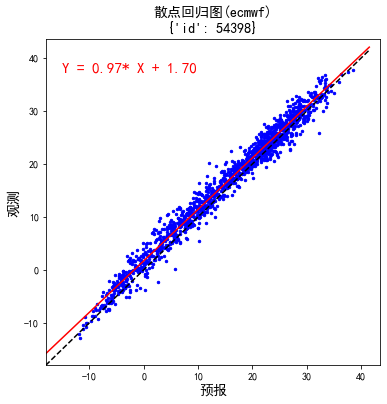

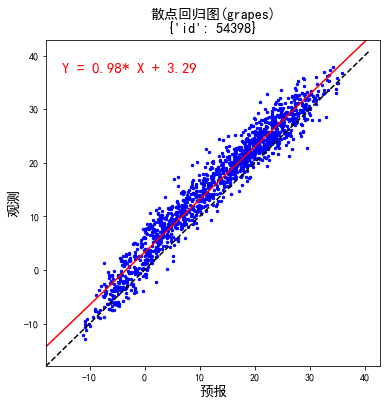

In [9]:
mpd.plot(sta_all,mem.scatter_regress,s = {"id":54398}) #选取54398站进行检验，group_by = None

从上面的整体检验可以看出grapes模式在54398站上的温度预报存在系统性偏低的情况。如果想进一步分析不同时刻起报的预报是否都存在这样的问题，可以进一步设置group_by = "hour"来检验，如下：

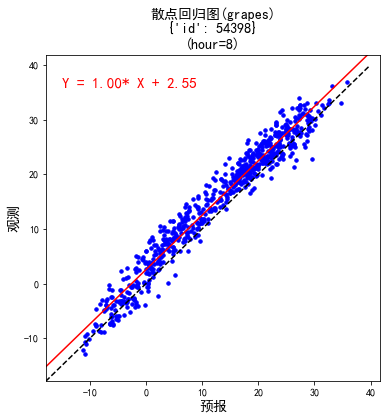

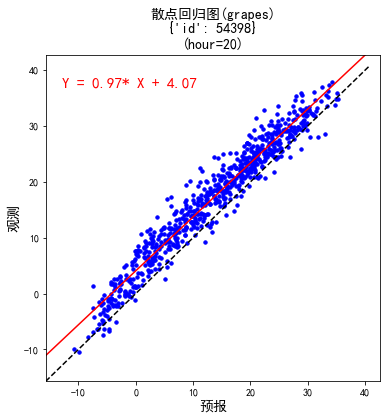

[8, 20]

In [18]:
mpd.plot(sta_all,mem.scatter_regress,s = {"id":54398,"member":["ob","grapes"]},g = "hour") 

In [12]:
#设置save_dir,程序自动生成文件名，将图片批量输出到指定文件夹中
mpd.plot(sta_all,mem.scatter_regress,s = {"member":["ob","grapes"]},g = "hour",save_dir = r"H:\test_data\output\mpd\base\plot") 

检验结果已以图片形式保存至H:/test_data/output/mpd/base/plot/scatter_regress_grapes_hour8.png
检验结果已以图片形式保存至H:/test_data/output/mpd/base/plot/scatter_regress_grapes_hour20.png


[8, 20]

通过上面的检验分析可以发现grape在08和20时起报的预报都存在偏低的情况，其中20起报的预报误差偏差更显著。为此还可以进一步研究该偏差是否有日变化的趋势，为此可以进一步以group_by = "ob_hour"来分析。

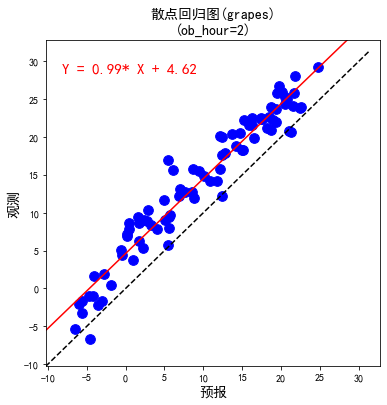

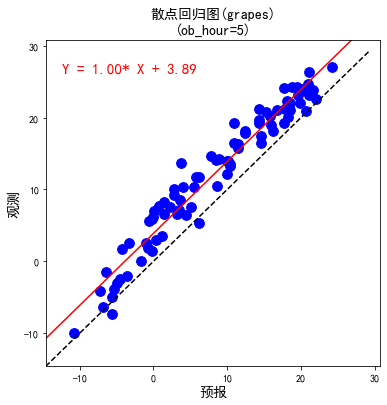

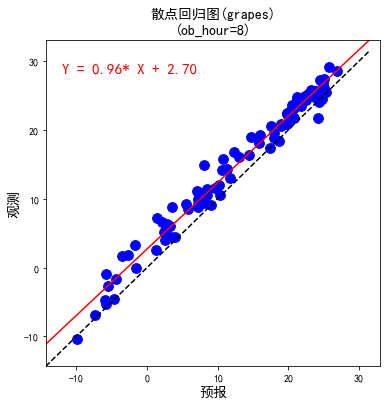

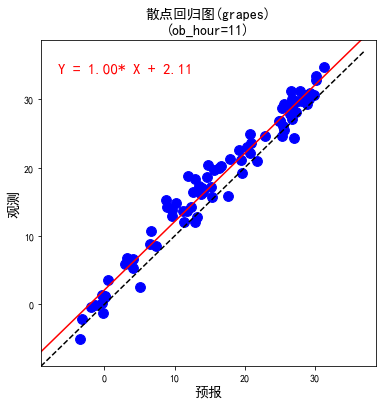

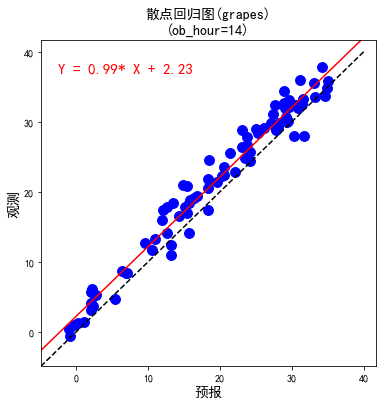

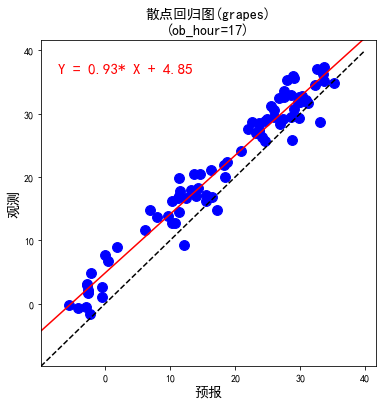

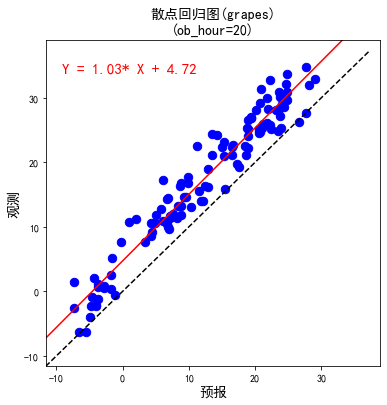

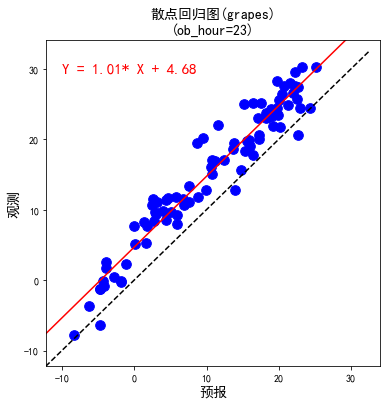

[2, 5, 8, 11, 14, 17, 20, 23]

In [19]:
#选择20时起报的grapes预报,按日变化分组
sta_part = meb.sele_by_dict(sta_all,s= {"hour":20,"member":["ob","grapes"],"id":54398})
mpd.plot(sta_part,mem.scatter_regress,g = "ob_hour") 

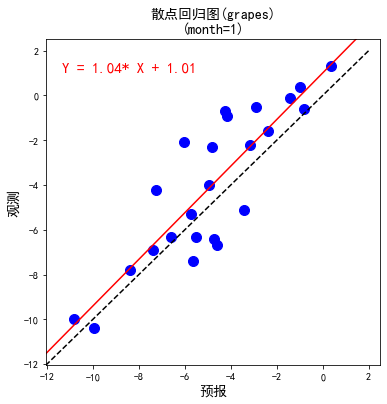

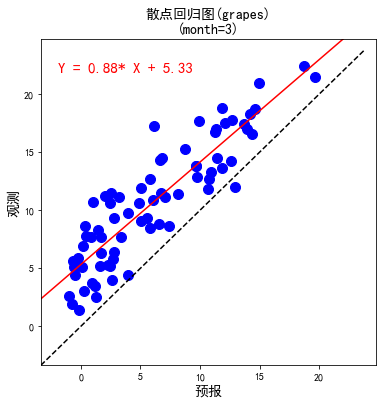

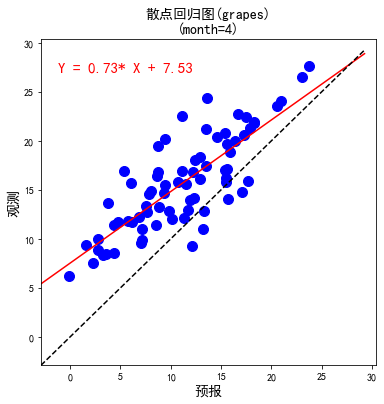

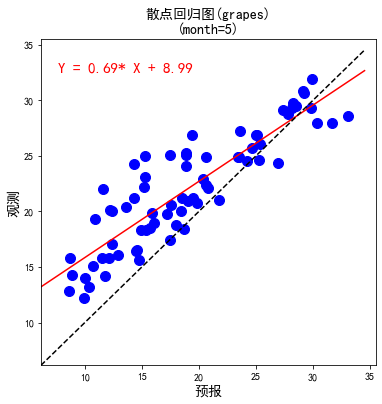

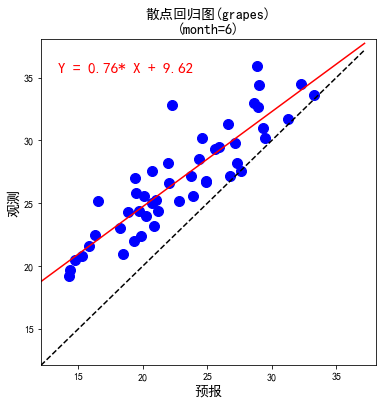

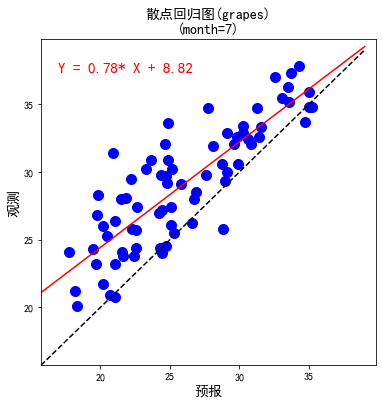

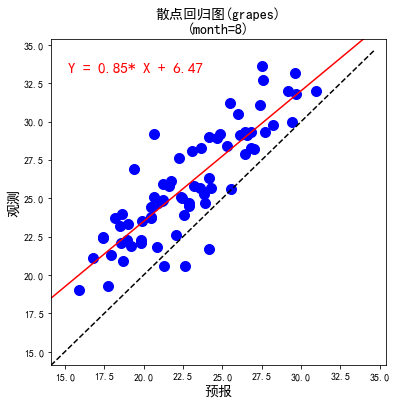

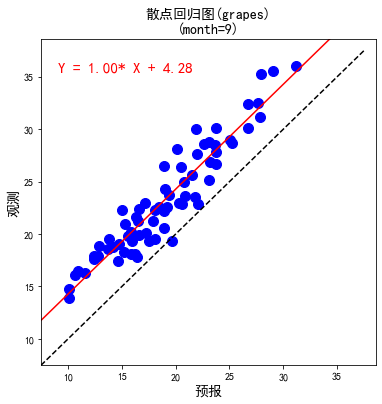

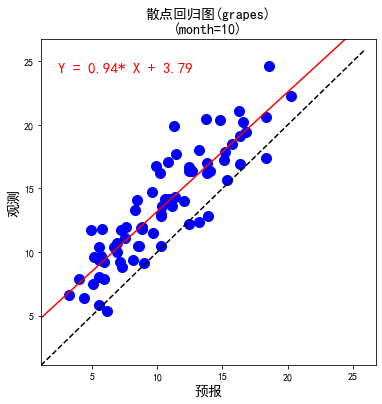

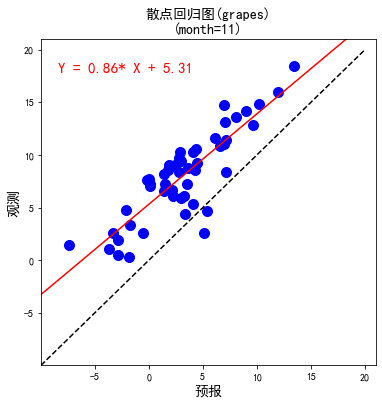

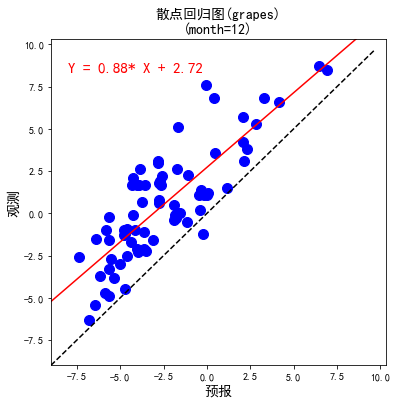

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [20]:
mpd.plot(sta_part,mem.scatter_regress,g = "month") 

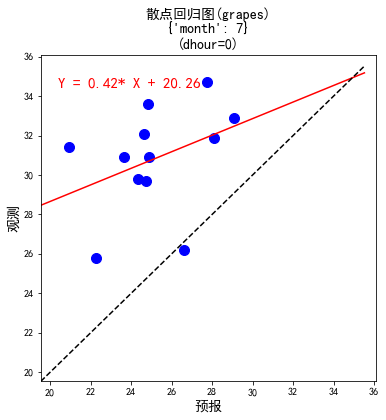

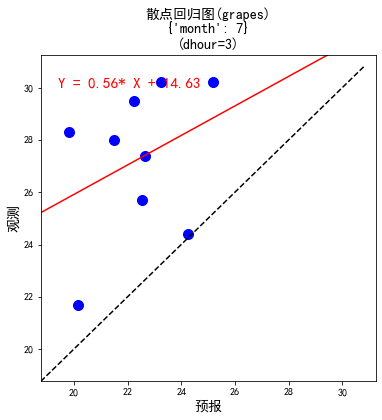

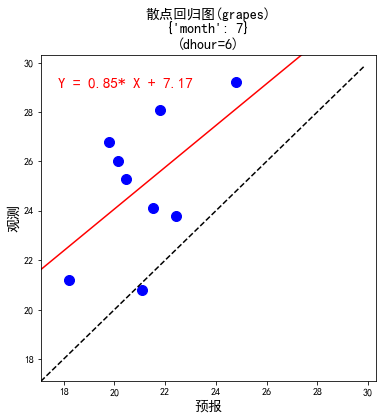

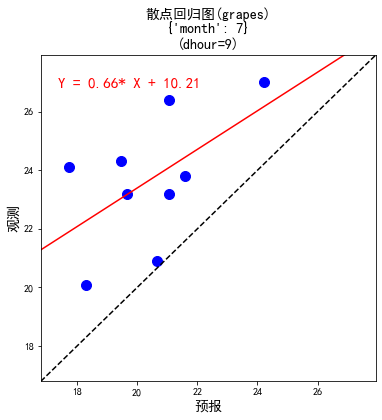

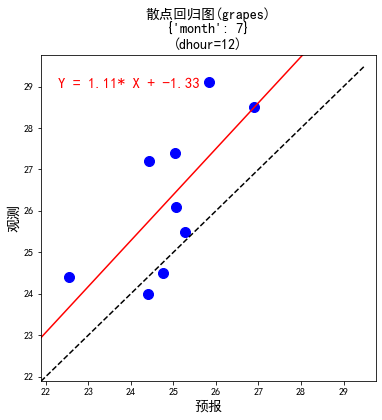

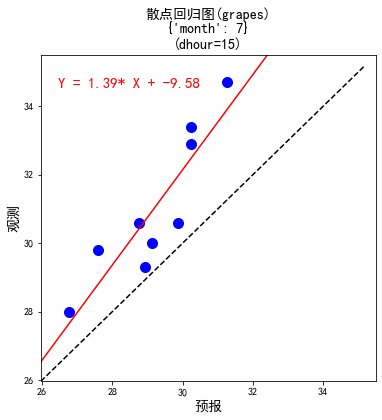

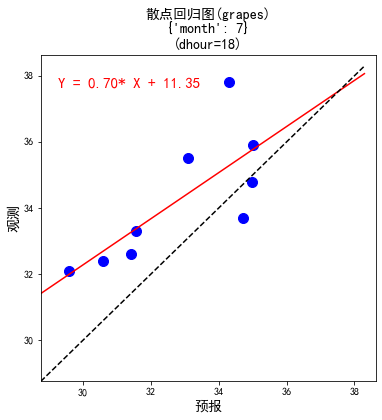

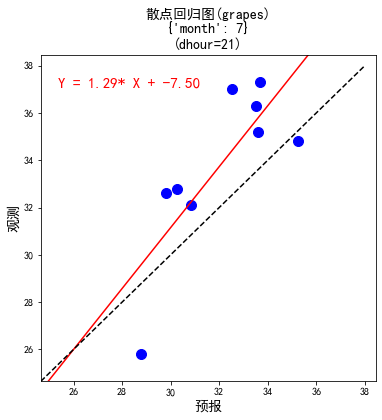

[0, 3, 6, 9, 12, 15, 18, 21]

In [22]:
mpd.plot(sta_part,mem.scatter_regress,s = {"month":7},g = "dhour")   #进一步选择7月份的数据，按时效的日周期展开分析

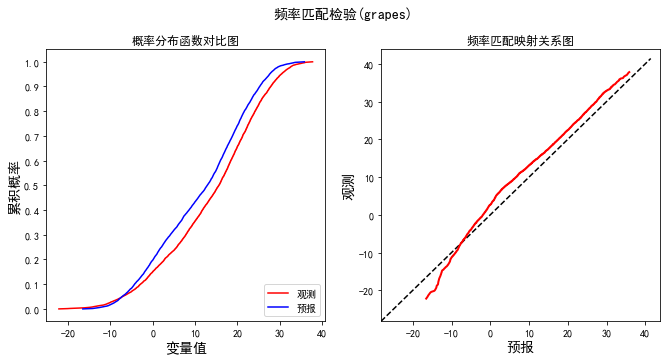

In [23]:
mpd.plot(sta_all,mem.pdf_plot,s = {"member":["ob","grapes"]}) 

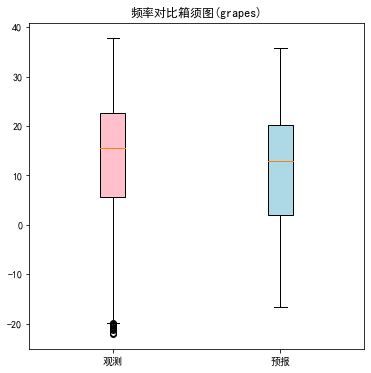

In [26]:
mpd.plot(sta_all,mem.box_plot_continue,s = {"member":["ob","grapes"]}) 

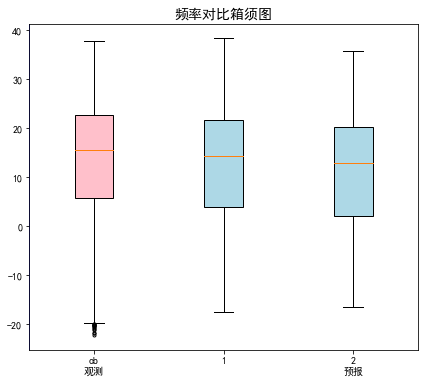

In [38]:
mpd.plot(sta_all,mem.box_plot_ensemble)  #此处将不同模式的预报看做是不同集合成员，一共有两个集合成员

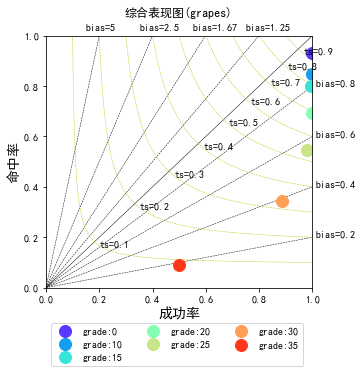

In [29]:
mpd.plot(sta_grapes,mem.performance,para1 = [0,10,15,20,25,30,35])

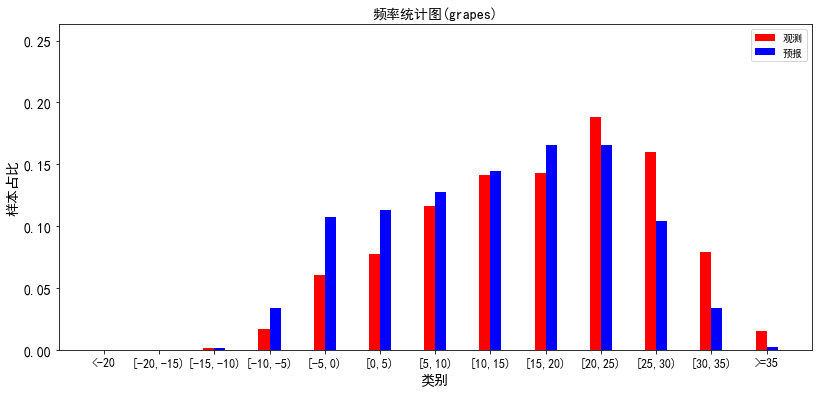

In [30]:
mpd.plot(sta_grapes,mem.multi_category.plot.frequency_histogram,para1 = np.arange(-20,40,5).tolist())

In [39]:
#一下构造一个概率预报用于测试
import copy
sta_ec = meb.in_member_list(sta_all,["ob","ecmwf"])  #提取观测和ec预报的温度数据
sta_ec = meb.between_value_range(sta_ec,-4,4)        #测试数据中仅保留观测和预报的取值范围都在 -4 到4 之内的样本
sta_p0 =copy.deepcopy(sta_ec)          #开始构建概率预报，设预报的目标是观测值大于 0  的概率
p_ob = np.zeros(len(sta_p0.index))     #原始观测值小于0，则观测样本的概率值被记为0
p_ob[sta_p0["ob"]> 0] = 1              #原始观测值大于0，则观测样本的概率值记为1
sta_p0["ob"] = p_ob[:]
p_fo = (sta_p0["ecmwf"].values+4)/8    #概率预报 采用 原始预报的线性函数代表，取值范围会在0-1之间。
sta_p0["ecmwf"] = p_fo
print(sta_p0)    #打印构建的概率预报结果

      level                time  dtime     id    lon   lat   ob   ecmwf
13        0 2019-03-02 20:00:00      0  54410  116.1  40.6  1.0  0.7530
18        0 2019-03-08 08:00:00      0  54398  116.6  40.1  1.0  0.4915
20        0 2019-03-08 08:00:00      0  54416  116.9  40.4  0.0  0.3940
21        0 2019-03-08 08:00:00      0  54419  116.6  40.4  0.0  0.3460
22        0 2019-03-08 08:00:00      0  54499  116.2  40.2  1.0  0.2590
...     ...                 ...    ...    ...    ...   ...  ...     ...
8325      0 2019-12-13 20:00:00     72  54416  116.9  40.4  0.0  0.2430
8326      0 2019-12-13 20:00:00     72  54419  116.6  40.4  0.0  0.1170
8327      0 2019-12-13 20:00:00     72  54499  116.2  40.2  0.0  0.0915
8328      0 2019-12-13 20:00:00     72  54412  116.6  40.7  0.0  0.0055
8335      0 2019-12-24 20:00:00     72  54398  116.6  40.1  0.0  0.2285

[859 rows x 8 columns]


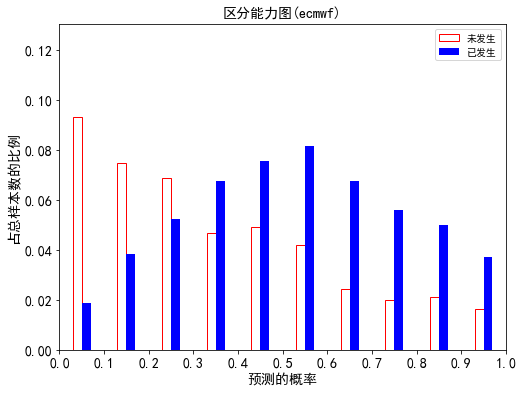

In [40]:
mpd.plot(sta_p0,mem.probability.plot.discrimination)  #绘制概率预报区分能力图

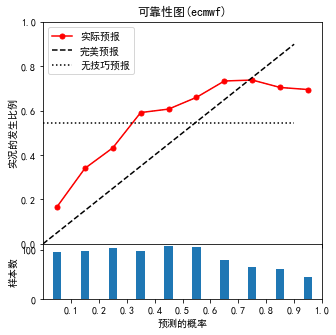

In [41]:
mpd.plot(sta_p0,mem.probability.plot.reliability)  #绘制概率预报区分能力图

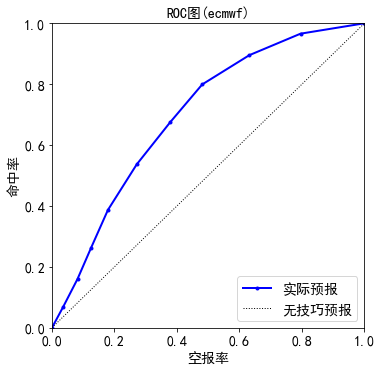

In [42]:
mpd.plot(sta_p0,mem.probability.plot.roc)

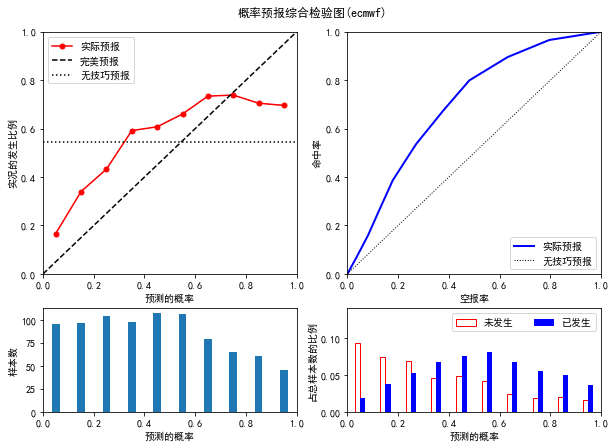

In [43]:
mpd.plot(sta_p0,mem.probability.plot.comprehensive_probability)